In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
Data=pd.read_csv('creditcard.csv')

In [3]:
Data.shape

(284807, 31)

In [4]:
Data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
Data[Data['Class']==1].shape

(492, 31)

In [6]:
Data[Data['Class']==0].shape

(284315, 31)

In [7]:
outlier_fraction=len(Data[Data['Class']==1])/len(Data[Data['Class']==0])
print(outlier_fraction)

0.0017304750013189597


In [8]:
total_fraud=len(Data[Data['Class']==1])
total_normal=len(Data[Data['Class']==0])
total_fraud_percent=total_fraud*100/(total_fraud+total_normal)

In [9]:
print(total_fraud)
print(total_normal)
print(total_fraud_percent)

492
284315
0.1727485630620034


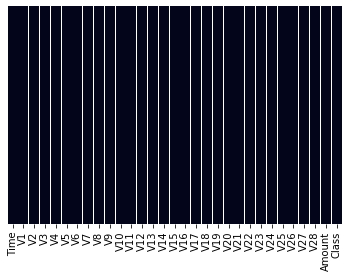

In [10]:
sns.heatmap(Data.isnull(),yticklabels=False,cbar=False)

In [11]:
Data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
X=Data.iloc[:,:-1].values
y=Data.iloc[:,-1].values

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [14]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [15]:
import xgboost
cls=xgboost.XGBClassifier()

In [17]:
params={
    'max_depth':[1,3,5,7,9,10],
    'learning_rate':[0.01,0.03,0.05,0.07,0.1],
    'n_estimators':[100,300,500,800,1000],
    'gamma':[0,0.1,0.3,0.5,0.8,1],
    'min_child_weight':[0,1,3,5,8,10],
    'colsample_bytree':[0,0.1,0.3,0.5,0.7,1],
    'colsample_bylevel':[0,0.1,0.3,0.5,0.7,1],
    'colsample_bynode':[0,0.1,0.3,0.5,0.7,1],
    'reg_alpha':[0,0.1,0.3,0.5,0.7,1],
    'reg_lambda':[0,0.1,0.3,0.5,0.7,1]
}

In [18]:
from sklearn.model_selection import RandomizedSearchCV
rnd_obj=RandomizedSearchCV(cls,param_distributions=params,n_iter=5,n_jobs=-1,cv=5,random_state=0)

In [19]:
rnd_obj.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                        'colsample_bytree': [0, 0.1, 0.3, 0.5,
                                                             0.7, 1],
                            

In [20]:
rnd_obj.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.1,
              colsample_bynode=0, colsample_bytree=0.5, gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=10, missing=None, n_estimators=800, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [21]:
rnd_obj.best_params_

{'reg_lambda': 0.1,
 'reg_alpha': 0,
 'n_estimators': 800,
 'min_child_weight': 10,
 'max_depth': 7,
 'learning_rate': 0.1,
 'gamma': 0.1,
 'colsample_bytree': 0.5,
 'colsample_bynode': 0,
 'colsample_bylevel': 0.1}

In [22]:
cls1=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.1,
              colsample_bynode=0, colsample_bytree=0.5, gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=10, missing=None, n_estimators=800, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [23]:
cls1.fit(X_train,y_train)
y_pred1=cls1.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred1)

0.9995435553526912

In [25]:
cv=confusion_matrix(y_test,y_pred1)
print(cv)

[[56855     6]
 [   20    81]]


In [26]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=rnd_obj,X=X_train,y=y_train,cv=5)
print(accuracies)
print(accuracies.mean())
print(accuracies.std())

[0.99958305 0.99956111 0.99956111 0.99947333 0.99945138]
0.9995259935482455
5.3031868040095154e-05


In [27]:
params2={
    'max_depth':[7],
    'learning_rate':[0.09,0.1,0.15],
    'n_estimators':[700,800,900],
    'gamma':[0.05,0.1,0.15],
    'min_child_weight':[9,10,11],
    'colsample_bytree':[0.4,0.5,0.6],
    'colsample_bylevel':[0.05,0.1,0.15],
    'colsample_bynode':[0,0.01,0.05],
    'reg_alpha':[0,0.01,0.05],
    'reg_lambda':[0.05,0.1,0.15]
}

In [28]:
rnd_obj2=RandomizedSearchCV(cls,param_distributions=params2,n_iter=5,n_jobs=-1,cv=5,random_state=0)

In [29]:
rnd_obj2.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                        'colsample_bynode': [0, 0.01, 0.05],
                                        'colsample_bytree': [0.4, 0.5, 0.6],
                       

In [30]:
rnd_obj2.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.05,
              colsample_bynode=0.01, colsample_bytree=0.4, gamma=0.15,
              learning_rate=0.09, max_delta_step=0, max_depth=7,
              min_child_weight=11, missing=None, n_estimators=700, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.01, reg_lambda=0.15, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [32]:
cls2=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.05,
              colsample_bynode=0.01, colsample_bytree=0.4, gamma=0.15,
              learning_rate=0.09, max_delta_step=0, max_depth=7,
              min_child_weight=11, missing=None, n_estimators=700, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.01, reg_lambda=0.15, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [33]:
cls2.fit(X_train,y_train)
y_pred2=cls2.predict(X_test)

In [34]:
accuracy_score(y_test,y_pred2)

0.9995435553526912

In [35]:
cv2=confusion_matrix(y_test,y_pred2)
print(cv2)

[[56855     6]
 [   20    81]]


In [36]:
accuracies=cross_val_score(estimator=cls2,X=X_train,y=y_train,cv=5)
print(accuracies)
print(accuracies.mean())
print(accuracies.std())

[0.99956111 0.99949527 0.99964888 0.99949527 0.99949527]
0.9995391603941275
6.049748184986784e-05


In [37]:
from sklearn.ensemble import IsolationForest
isf_cls=IsolationForest()

In [38]:
isf_cls.fit(X_train,y_train)
y_pred_isf=isf_cls.predict(X_test)

In [39]:
y_pred_isf[y_pred_isf==1]=0
y_pred_isf[y_pred_isf==-1]=1

In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred_isf)

0.9654506513114006

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_isf))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56861
           1       0.04      0.85      0.08       101

    accuracy                           0.97     56962
   macro avg       0.52      0.91      0.53     56962
weighted avg       1.00      0.97      0.98     56962



In [42]:
cv_isf=confusion_matrix(y_test,y_pred_isf)
print(cv_isf)

[[54908  1953]
 [   15    86]]


In [43]:
print("Percentage of fraud transactions caught: ",(86/(86+15))*100)

Percentage of fraud transactions caught:  85.14851485148515


In [44]:
isf_params1={
    'n_estimators':[100,200,500,800,1000],
    'contamination':[0,0.01,0.03,0.05,0.07,0.09,0.1],
    'max_samples':[0,0.01,0.03,0.05,0.07,0.09,0.1],
    'max_features':[0,0.01,0.03,0.05,0.07,0.09,0.1]
}

In [83]:
from sklearn.model_selection import RandomizedSearchCV
rs1 = RandomizedSearchCV(isf_cls,param_distributions=isf_params1,cv=5,
                  scoring='accuracy',return_train_score=True,verbose=True,n_jobs=-1,random_state=0)

In [84]:
rs1.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 33.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 37.7min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=IsolationForest(behaviour='deprecated',
                                             bootstrap=False,
                                             contamination='auto',
                                             max_features=1.0,
                                             max_samples='auto',
                                             n_estimators=100, n_jobs=None,
                                             random_state=None, verbose=0,
                                             warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'contamination': [0, 0.01, 0.03, 0.05,
                                                          0.07, 0.09, 0.1],
                                        'max_features': [0, 0.01, 0.03, 0.05,
                                                         0.07, 0.09, 0.1],
                                        'max_sampl

In [85]:
rs1.best_estimator_

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.03,
                max_features=0.01, max_samples=0.1, n_estimators=1000,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [132]:
hyper_isf_cls=IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.07,
                max_features=0.1, max_samples=0.1, n_estimators=200,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [133]:
hyper_isf_cls.fit(X_train,y_train)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.07,
                max_features=0.1, max_samples=0.1, n_estimators=200,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [134]:
hyper_y_pred_isf=hyper_isf_cls.predict(X_test)

In [135]:
hyper_y_pred_isf[hyper_y_pred_isf==1]=0
hyper_y_pred_isf[hyper_y_pred_isf==-1]=1

In [136]:
accuracy_score(y_test,hyper_y_pred_isf)

0.9311119693830975

In [137]:
print(classification_report(y_test,hyper_y_pred_isf))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     56861
           1       0.02      0.91      0.04       101

    accuracy                           0.93     56962
   macro avg       0.51      0.92      0.50     56962
weighted avg       1.00      0.93      0.96     56962



In [138]:
hyper_cv_isf=confusion_matrix(y_test,hyper_y_pred_isf)
print(hyper_cv_isf)

[[52946  3915]
 [    9    92]]


In [131]:
print("Percentage of fraud transactions caught: ",(92/(92+9))*100)

Percentage of fraud transactions caught:  91.0891089108911
